# Bike Sharing System 2011-2012

> #### Hipótesis
**La hipótesis principal de este proyecto es que la estación del año tiene un 
impacto en la cantidad de los viajes en bicicleta. Específicamente, 
se espera que el uso de bicicletas varíe de manera estacional, con picos durante las 
estaciones más cálidas y una disminución en las estaciones más frías.**
 

Importamos librerías

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos Datos Crudos

In [10]:
df = pd.read_csv('./bike+sharing+dataset/hour.csv')
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [11]:
df.shape

(17379, 17)

In [12]:
df2011 = df.query('yr == 0')
df2011.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [13]:
df2011.shape

(8645, 17)

In [14]:
df2011.to_csv('Dataset_2011.csv')

In [15]:
df2012 = df.query('yr == 1')
df2012.to_csv('Dataset_2012.csv')

In [4]:
df2011 = pd.read_csv('Dataset_2011.csv', sep=',', index_col='instant')
df2011.head()

Unnamed: 0      dteday  season  yr  mnth  hr  holiday  weekday  \
instant                                                                   
1                 0  2011-01-01       1   0     1   0        0        6   
2                 1  2011-01-01       1   0     1   1        0        6   
3                 2  2011-01-01       1   0     1   2        0        6   
4                 3  2011-01-01       1   0     1   3        0        6   
5                 4  2011-01-01       1   0     1   4        0        6   

         workingday  weathersit  temp   atemp   hum  windspeed  casual  \
instant                                                                  
1                 0           1  0.24  0.2879  0.81        0.0       3   
2                 0           1  0.22  0.2727  0.80        0.0       8   
3                 0           1  0.22  0.2727  0.80        0.0       5   
4                 0           1  0.24  0.2879  0.75        0.0       3   
5                 0           1  0.24  0.2879  0.75        0.0       0   

         registered  cnt  
instant                   
1                13   16  
2                32   40  
3                27   32  
4                10   13  
5                 1    1

In [5]:
df2011.shape

(8645, 17)

- Cargamos el DataFrame, luego de guardarlo en un archivo .CSV. 
- Ahora analizaremos los tipos de datos, si se encuentran valores nulos como duplicados y trataremos con ellos para después de la limpieza comenzar a responder nuestra hipotesis.
- Comenzaremos a ver si nuestras variables poseen alguna relación y de que tipo.

In [4]:
df2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8645 entries, 1 to 8645
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8645 non-null   int64  
 1   dteday      8645 non-null   object 
 2   season      8645 non-null   int64  
 3   yr          8645 non-null   int64  
 4   mnth        8645 non-null   int64  
 5   hr          8645 non-null   int64  
 6   holiday     8645 non-null   int64  
 7   weekday     8645 non-null   int64  
 8   workingday  8645 non-null   int64  
 9   weathersit  8645 non-null   int64  
 10  temp        8645 non-null   float64
 11  atemp       8645 non-null   float64
 12  hum         8645 non-null   float64
 13  windspeed   8645 non-null   float64
 14  casual      8645 non-null   int64  
 15  registered  8645 non-null   int64  
 16  cnt         8645 non-null   int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 1.2+ MB


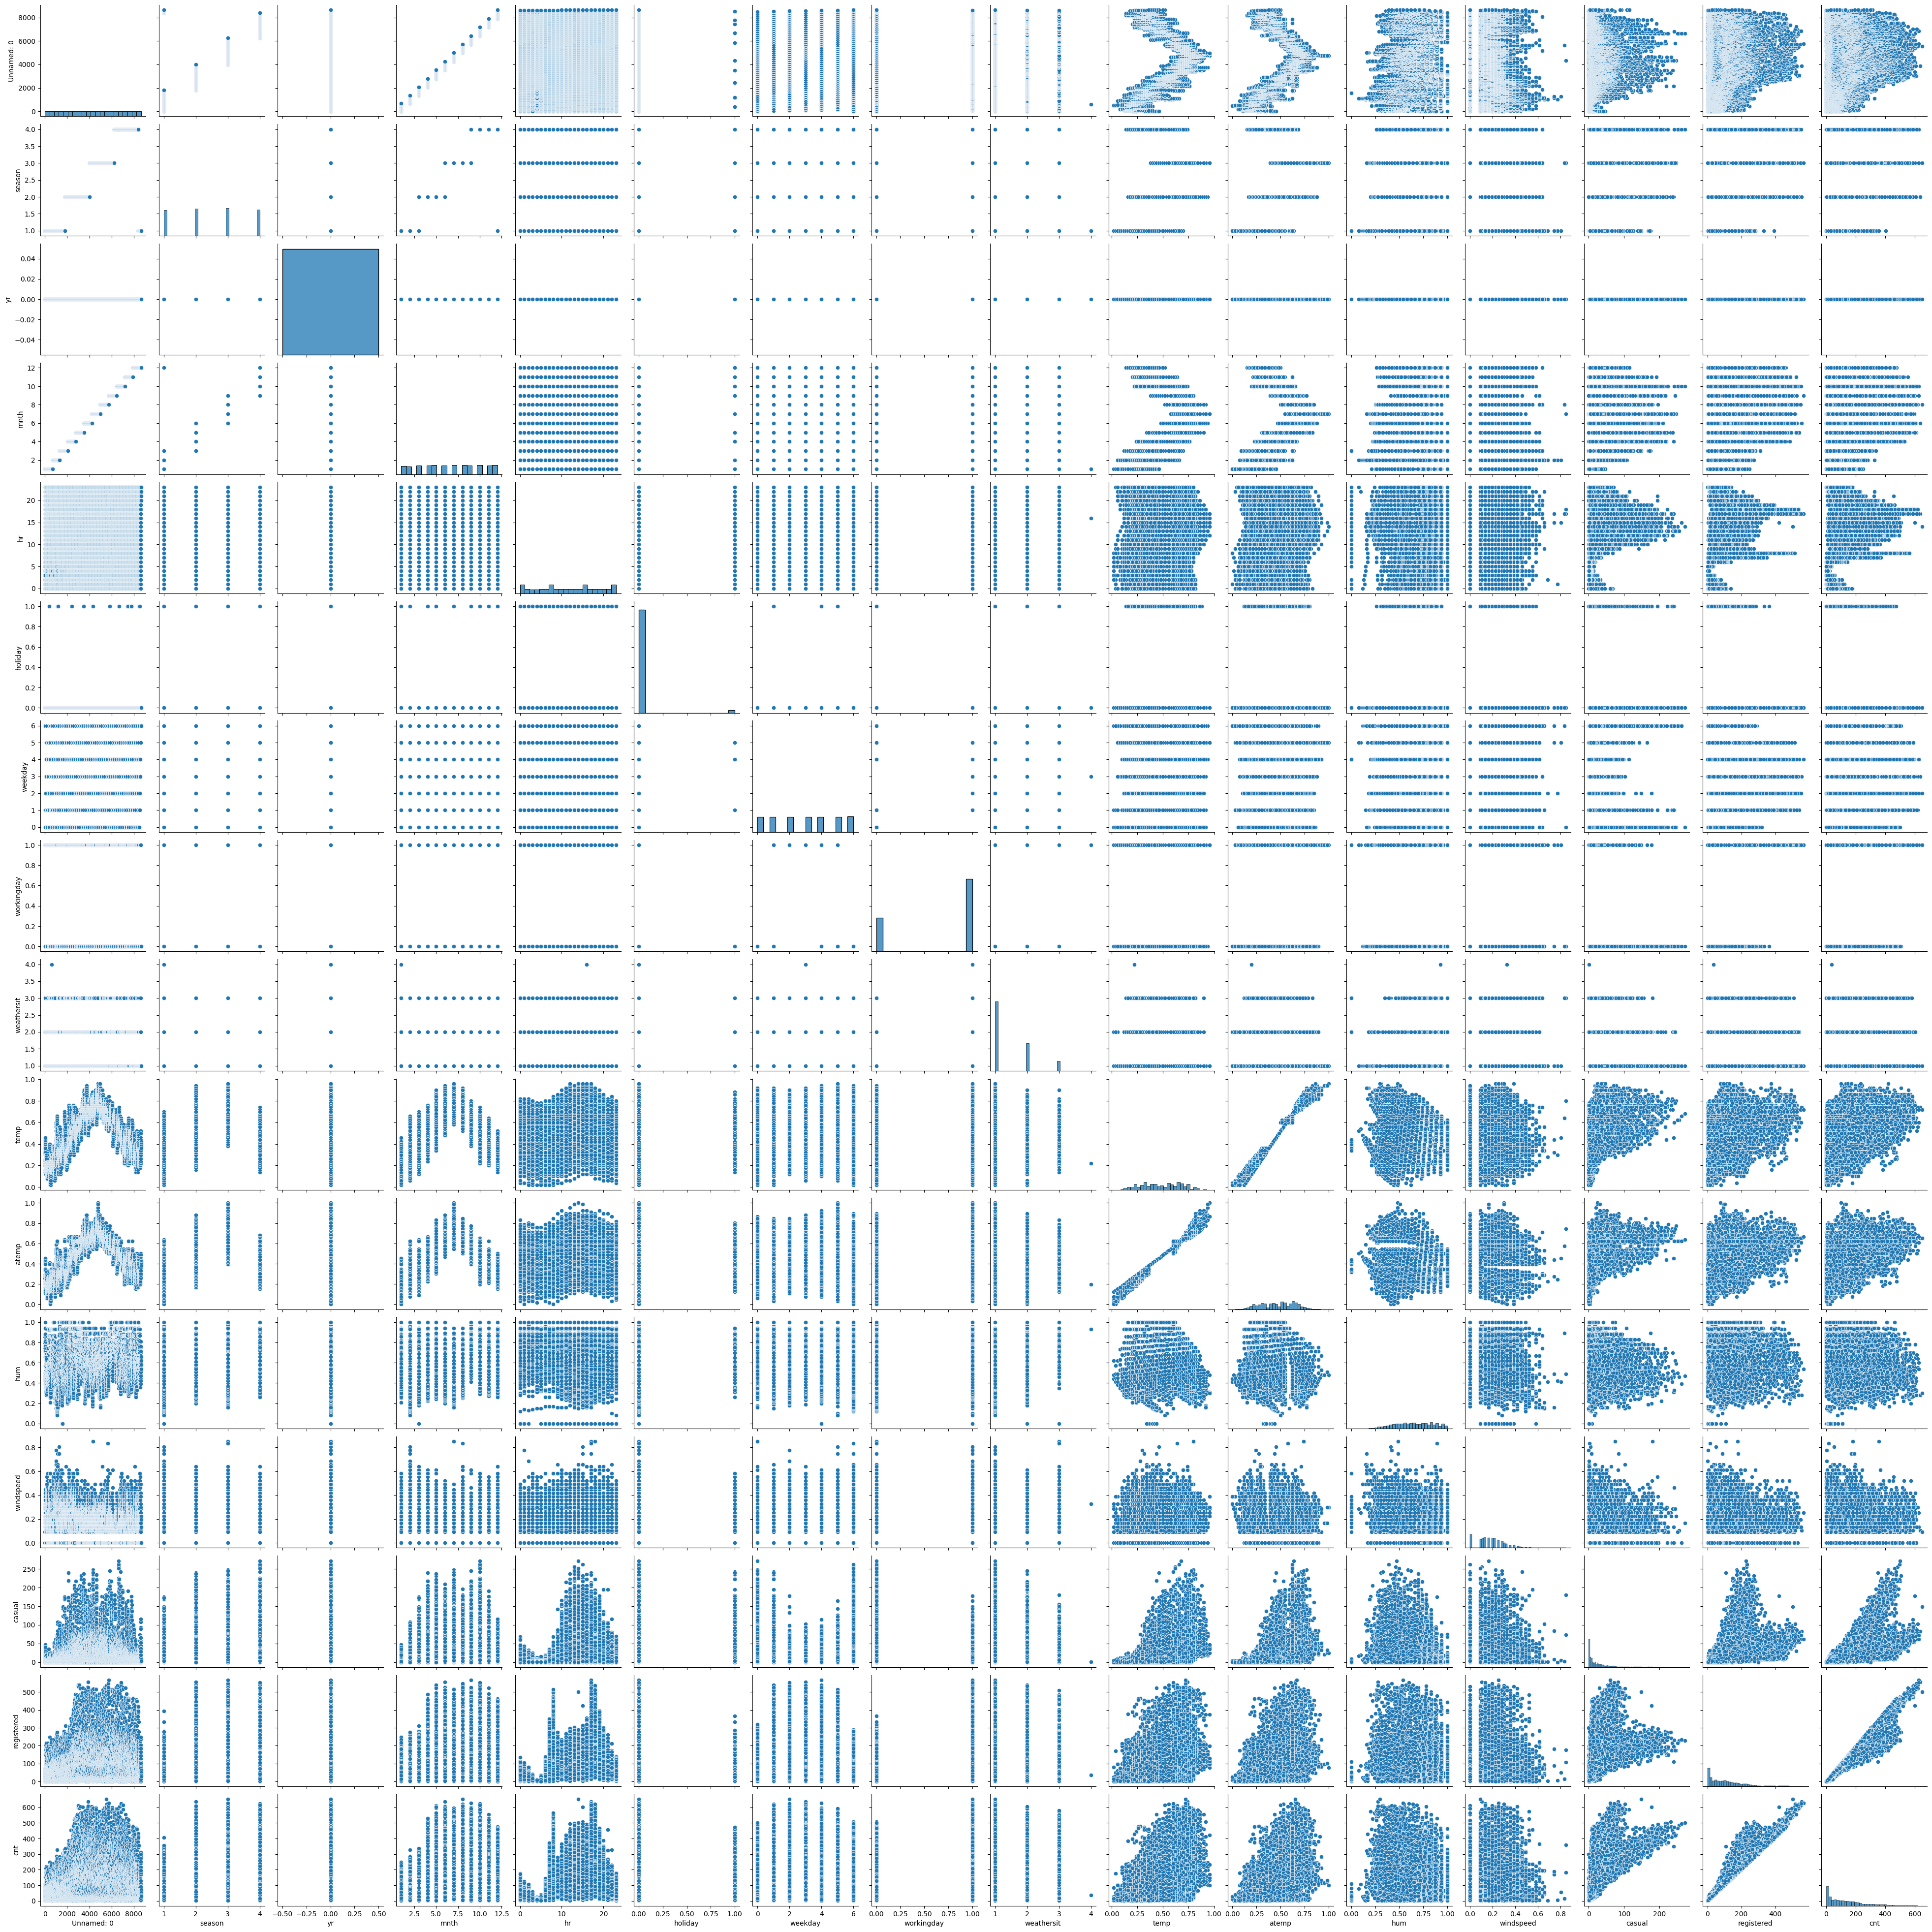

In [6]:
sns.pairplot(df2011)

In [20]:
df2011.select_dtypes(exclude=['object']).corr()

instant    season  yr      mnth        hr   holiday   weekday  \
instant     1.000000  0.824925 NaN  0.996461 -0.008772  0.031203  0.010960   
season      0.824925  1.000000 NaN  0.829054 -0.012179 -0.001116 -0.013639   
yr               NaN       NaN NaN       NaN       NaN       NaN       NaN   
mnth        0.996461  0.829054 NaN  1.000000 -0.011814  0.029806  0.012024   
hr         -0.008772 -0.012179 NaN -0.011814  1.000000 -0.000929 -0.005618   
holiday     0.031203 -0.001116 NaN  0.029806 -0.000929  1.000000 -0.076324   
weekday     0.010960 -0.013639 NaN  0.012024 -0.005618 -0.076324  1.000000   
workingday  0.003052  0.013763 NaN  0.003573  0.003792 -0.247934  0.018572   
weathersit -0.020071 -0.015351 NaN -0.020662 -0.016521  0.008001  0.027766   
temp        0.259605  0.343535 NaN  0.260442  0.120548 -0.020059 -0.038969   
atemp       0.271344  0.351910 NaN  0.272676  0.116382 -0.026915 -0.042439   
hum         0.188215  0.191793 NaN  0.188061 -0.251188 -0.022895 -0.051307   
windspeed  -0.154082 -0.154735 NaN -0.155645  0.125153  0.000502  0.039586   
casual      0.090751  0.141894 NaN  0.092833  0.303720  0.052906 -0.013475   
registered  0.185476  0.220666 NaN  0.186191  0.390313 -0.046779 -0.000500   
cnt         0.178084  0.221719 NaN  0.179273  0.407486 -0.022912 -0.004321   

            workingday  weathersit      temp     atemp       hum  windspeed  \
instant       0.003052   -0.020071  0.259605  0.271344  0.188215  -0.154082   
season        0.013763   -0.015351  0.343535  0.351910  0.191793  -0.154735   
yr                 NaN         NaN       NaN       NaN       NaN        NaN   
mnth          0.003573   -0.020662  0.260442  0.272676  0.188061  -0.155645   
hr            0.003792   -0.016521  0.120548  0.116382 -0.251188   0.125153   
holiday      -0.247934    0.008001 -0.020059 -0.026915 -0.022895   0.000502   
weekday       0.018572    0.027766 -0.038969 -0.042439 -0.051307   0.039586   
workingday    1.000000    0.068628  0.053405  0.052551  0.025305   0.010509   
weathersit    0.068628    1.000000 -0.092036 -0.096556  0.407634   0.048414   
temp          0.053405   -0.092036  1.000000  0.992022 -0.039525  -0.005989   
atemp         0.052551   -0.096556  0.992022  1.000000 -0.023541  -0.046120   
hum           0.025305    0.407634 -0.039525 -0.023541  1.000000  -0.263196   
windspeed     0.010509    0.048414 -0.005989 -0.046120 -0.263196   1.000000   
casual       -0.324750   -0.159279  0.478931  0.473859 -0.307096   0.066113   
registered    0.129540   -0.118628  0.381614  0.378275 -0.243815   0.080874   
cnt           0.011704   -0.143288  0.451233  0.447029 -0.288615   0.085356   

              casual  registered       cnt  
instant     0.090751    0.185476  0.178084  
season      0.141894    0.220666  0.221719  
yr               NaN         NaN       NaN  
mnth        0.092833    0.186191  0.179273  
hr          0.303720    0.390313  0.407486  
holiday     0.052906   -0.046779 -0.022912  
weekday    -0.013475   -0.000500 -0.004321  
workingday -0.324750    0.129540  0.011704  
weathersit -0.159279   -0.118628 -0.143288  
temp        0.478931    0.381614  0.451233  
atemp       0.473859    0.378275  0.447029  
hum        -0.307096   -0.243815 -0.288615  
windspeed   0.066113    0.080874  0.085356  
casual      1.000000    0.518816  0.714742  
registered  0.518816    1.000000  0.968717  
cnt         0.714742    0.968717  1.000000

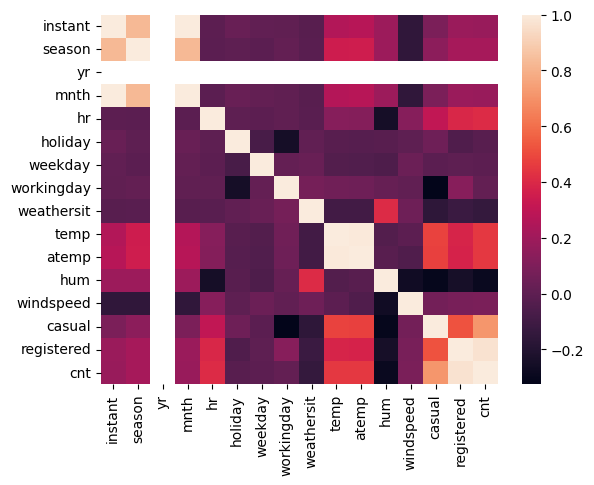

In [22]:
sns.heatmap(df2011.select_dtypes(exclude=['object']).corr())
# df2011.drop(columns = df2011.describe(include='object')).corr()
plt.show()

In [24]:
df2011.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

La instancia se tomaba como índice que comienza desde el 1, por eso su ubicación. El unhamed, eralo mismo pero desde 0 prefiero trabajar con uno solo de ellos y elegí la instancia

In [55]:
df2011.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Claro, puedo traducirte los campos y proporcionarte una breve explicación de cada uno en español:

1. **instant**: índice del registro.
   - *Explicación*: Este campo simplemente contiene un número de índice que identifica cada registro en el conjunto de datos.

2. **dteday**: fecha.
   - *Explicación*: Este campo almacena la fecha en la que se registró la información.

3. **season**: estación (1: primavera, 2: verano, 3: otoño, 4: invierno).
   - *Explicación*: Indica la estación del año en la que se registraron los datos, con valores numéricos que corresponden a las estaciones.

4. **yr**: año (0: 2011, 1: 2012).
   - *Explicación*: Representa el año en el que se registraron los datos, donde "0" se refiere a 2011 y "1" a 2012.

5. **mnth**: mes (1 a 12).
   - *Explicación*: Indica el mes en el que se registraron los datos, con valores numéricos del 1 al 12 correspondientes a los meses.

6. **hr**: hora (0 a 23).
   - *Explicación*: Muestra la hora del día en la que se registraron los datos, en formato de 24 horas (0 a 23).

7. **holiday**: día festivo (si el día es festivo o no).
   - *Explicación*: Indica si el día en cuestión es un día festivo ("1" si lo es y "0" si no lo es). La información se extrae de un calendario de festivos.

8. **weekday**: día de la semana.
   - *Explicación*: Representa el día de la semana en el que se registraron los datos.

9. **workingday**: si el día es laborable (1 si el día no es fin de semana ni festivo, de lo contrario 0).
   - *Explicación*: Indica si el día es laborable (día hábil) con un valor de "1" si no es un fin de semana ni un día festivo, y "0" en caso contrario.

10. **weathersit**: situación meteorológica.
    - *Explicación*: Describe la situación meteorológica en el momento de la observación, con valores numéricos que representan diferentes condiciones climáticas.

    1. Despejado, Pocas nubes, Parcialmente nublado, Parcialmente nublado
    **Explicación**: Indica condiciones meteorológicas en las que el cielo está despejado o parcialmente nublado, con pocas nubes visibles.
    2. Niebla + Nublado, Niebla + Nubes rotas, Niebla + Pocas nubes, Niebla
    **Explicación**: Hace referencia a condiciones de niebla o bruma en combinación con nubes o cielo nublado.
    3. Lluvia ligera, Lluvia ligera + Tormenta + Nubes dispersas, Lluvia ligera + Nubes dispersas
    **Explicación**: Representa condiciones de lluvia ligera junto con la presencia de tormentas o nubes dispersas en el cielo.
    4. Lluvia intensa + Granizo + Tormenta + Niebla, Nieve + Niebl
    **Explicación**: Indica condiciones meteorológicas adversas, como lluvia intensa, granizo, tormenta, niebla o nevada con visibilidad reducida debido a la niebla.

11. **temp**: temperatura normalizada en Celsius.
    - *Explicación*: La temperatura se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 41, donde 41 es la temperatura máxima posible.

12. **atemp**: sensación térmica normalizada en Celsius.
    - *Explicación*: Al igual que la temperatura, la sensación térmica se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 50, donde 50 es la sensación térmica máxima posible.

13. **hum**: humedad normalizada.
    - *Explicación*: La humedad se encuentra normalizada y los valores se dividen entre 100, donde 100 representa la humedad máxima posible.

14. **windspeed**: velocidad del viento normalizada.
    - *Explicación*: La velocidad del viento se encuentra normalizada y los valores se dividen entre 67, donde 67 es la velocidad máxima posible del viento.

15. **casual**: conteo de usuarios casuales.
    - *Explicación*: Muestra la cantidad de usuarios que alquilaron bicicletas de forma casual.

16. **registered**: conteo de usuarios registrados.
    - *Explicación*: Indica la cantidad de usuarios que están registrados en el sistema y alquilaron bicicletas.

17. **cnt**: conteo total de bicicletas alquiladas, incluyendo usuarios casuales y registrados.
    - *Explicación*: Representa el total de bicicletas alquiladas en un período determinado, incluyendo tanto a usuarios casuales como a usuarios registrados.

Estos campos son parte de un conjunto de datos relacionado con el alquiler de bicicletas y proporcionan información sobre diversos aspectos de las condiciones meteorológicas, la fecha, la estación y el uso de bicicletas.

In [54]:
df2011.describe()

season      yr         mnth           hr      holiday  \
count  8645.000000  8645.0  8645.000000  8645.000000  8645.000000   
mean      2.513592     0.0     6.573973    11.573626     0.027646   
std       1.105477     0.0     3.428147     6.907822     0.163966   
min       1.000000     0.0     1.000000     0.000000     0.000000   
25%       2.000000     0.0     4.000000     6.000000     0.000000   
50%       3.000000     0.0     7.000000    12.000000     0.000000   
75%       3.000000     0.0    10.000000    18.000000     0.000000   
max       4.000000     0.0    12.000000    23.000000     1.000000   

           weekday   workingday   weathersit         temp       atemp  \
count  8645.000000  8645.000000  8645.000000  8645.000000  8645.00000   
mean      3.012724     0.683748     1.437594     0.489069     0.46900   
std       2.006370     0.465040     0.653859     0.197943     0.17676   
min       0.000000     0.000000     1.000000     0.020000     0.00000   
25%       1.000000     0.000000     1.000000     0.320000     0.31820   
50%       3.000000     1.000000     1.000000     0.500000     0.48480   
75%       5.000000     1.000000     2.000000     0.660000     0.62120   
max       6.000000     1.000000     4.000000     0.960000     1.00000   

               hum    windspeed       casual   registered          cnt  
count  8645.000000  8645.000000  8645.000000  8645.000000  8645.000000  
mean      0.643430     0.191172    28.600578   115.193869   143.794448  
std       0.196293     0.123191    38.840789   109.461014   133.797854  
min       0.000000     0.000000     0.000000     0.000000     1.000000  
25%       0.490000     0.104500     3.000000    26.000000    31.000000  
50%       0.650000     0.194000    14.000000    90.000000   109.000000  
75%       0.810000     0.283600    38.000000   168.000000   211.000000  
max       1.000000     0.850700   272.000000   567.000000   651.000000

Como tengo que analizar el año completo voy a realizar métricas por mes, para luego realizar una global.

KeyError: "None of [Index(['season', 'mnth', 'temp', 'atemp'], dtype='object')] are in the [index]"